一维细杆热传导问题的有限差分法

如图 4.2 所示的一维细杆，长度𝑙 = 10.0，热源𝑞(𝑥) = 𝑒YQ.d(CYl.d)B
,初始温
度φ(𝑥) = 0.1𝑥(10.0 − 𝑥),细杆两端温度为 0，

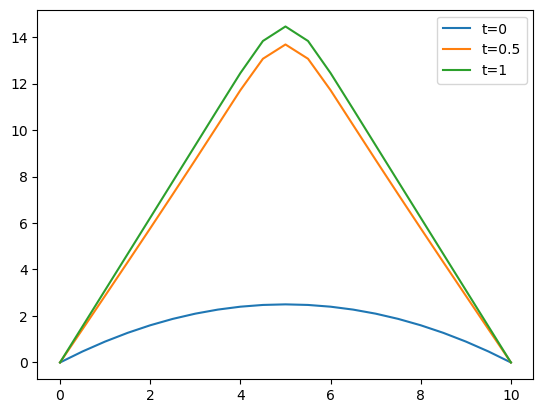

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tau = 0.05
h = 0.5
lamda = 1
A = 1 * tau / h**2
l = 10
Nx = int(l/h)
Nt = 1000

U = np.zeros([Nx+1, Nt+1])
t = np.arange(0, Nt, 1)
x = np.arange(0, (Nx+1) * h ,h)

for k in range(Nt):
    U[0, k] = 0
    U[Nx, k] = 0

for i in range(1, Nx):
    U[i, 0] = 0.1 * i * h * (10 - i * h )

for k in range(Nt-1):
    for i in range(1, Nx):
        U[i, k+1] = A * U[i+1, k] + A * U[i-1, k] + (1-2*A) * U[i, k] + tau * 5 * np.exp(-2*(i*h-5) ** 2)

plt.plot(x, U[:, 0], label='t=0')
plt.plot(x, U[:, Nt//2], label='t=0.5')
plt.plot(x, U[:, Nt], label='t=1')
plt.legend()
plt.show()




考虑图 4.6 所示的边长𝑙 = 10的正方形平板，其内部热源𝑞(𝑥, 𝑦) =
𝑒YQ.du(CYl.d)BZ(DYl.d)Bv,初始温度φ(𝑥, 𝑦) = 0，平板左右两个边界温度恒为 0，上
下两个边界绝热,则其有限差分格式和初边值条件如下：

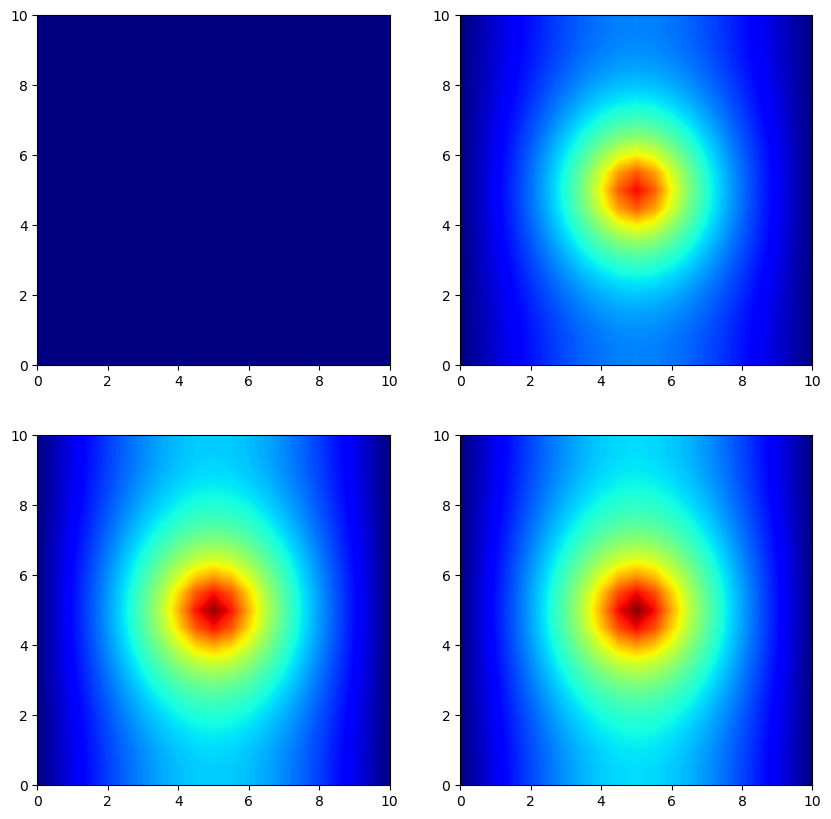

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

tau = 0.05
h = 0.5
lamda = 1
A = 1*tau / h**2
l = 10
Nx = int(l/h)
Ny = int(l/h)
Nt = 1000

U = np.zeros((Nx+1, Ny+1, Nt+1))
t = np.arange(0, Nt, 1)
x = np.arange(0, (Nx+1)*h, h)
y = np.arange(0, (Ny+1)*h, h)

U[:, :, 0] = 0

for k in range(0, Nt):
    for i in range(1, Nx):
        for j in range(1, Ny):
            U[i, j, k+1] = (1-4*A) * U[i, j, k] + A * (U[i+1, j, k] + U[i-1, j, k] + U[i, j+1, k] + U[i, j-1, k]) + tau*5*np.exp(-2*((i*h-5)**2 + (j*h-5)**2))

    for i in range(0, Nx+1):
        U[i, 0, k+1] = U[i, 1, k+1]
        U[i, Nx, k+1] = U[i, Nx-1, k+1]

    for j in range(0, Ny+1):
        U[0, j, k+1] = 0
        U[Nx, j, k+1] = 0

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

extent = [0, (Nx+1)*h, 0, (Ny+1)*h]
levels = np.arange(0, 3.5, 0.01)
cs1 = ax1.contourf(x, y, U[:, :, 0].T, levels=levels, extent=extent, cmap='jet')
cs2 = ax2.contourf(x, y, U[:, :, int(Nt/3)].T, levels=levels, extent=extent, cmap='jet')
cs3 = ax3.contourf(x, y, U[:, :, int(2*Nt/3)].T, levels=levels, extent=extent, cmap='jet')
cs4 = ax4.contourf(x, y, U[:, :, int(3*Nt/3)].T, levels=levels, extent=extent, cmap='jet')

plt.show()



反应扩散问题:描述自催化糖酵解反应的 Gray-Scott model

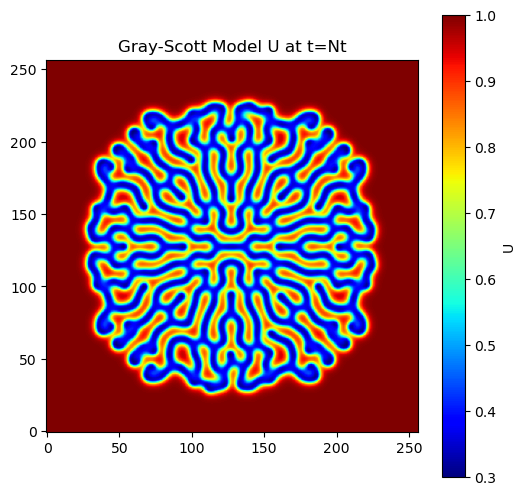

In [56]:
import numpy as numpy
import matplotlib.pyplot as plt
import pylab as pl

N = 256

Nt = 10000
tau = 1
h = 1
Du, Dv, f, r = 0.16, 0.08, 0.06, 0.062

Au = Du * tau / h**2
Av = Dv * tau / h**2

U = np.zeros((N+1, N+1, Nt+1))
V = np.zeros((N+1, N+1, Nt+1))

U[:, :, 0] = 0 + 0.02*np.random.random((N+1, N+1))
V[:, :, 0] = 0 + 0.02*np.random.random((N+1, N+1))

U[N//2-16:N//2+16, N//2-16:N//2+16, 0] = 0.5
V[N//2-16:N//2+16, N//2-16:N//2+16, 0] = 0.25

for k in range(Nt):     
    U[1:N,1:N,k+1] = (1-4.0*Au)*U[1:N,1:N,k]+ \
              Au*(U[2:N+1,1:N,k]+U[0:N-1,1:N,k]+U[1:N,2:N+1,k]+U[1:N,0:N-1,k])-\
              tau*U[1:N,1:N,k]*V[1:N,1:N,k]*V[1:N,1:N,k]+tau*f*(1.0-U[1:N,1:N,k])        
        
    V[1:N,1:N,k+1] = (1-4.0*Av)*V[1:N,1:N,k]+ \
              Av*(V[2:N+1,1:N,k]+V[0:N-1,1:N,k]+V[1:N,2:N+1,k]+V[1:N,0:N-1,k])+\
              tau*U[1:N,1:N,k]*V[1:N,1:N,k]*V[1:N,1:N,k]-tau*(f+r)*V[1:N,1:N,k]    


    U[1:N,0,k+1] = U[1:N,N-1,k+1]
    U[1:N,N,k+1] = U[1:N,1,k+1]
    V[1:N,0,k+1] = V[1:N,N-1,k+1]
    V[1:N,N,k+1] = V[1:N,1,k+1]

    U[0,0:N+1,k+1] = U[N-1,0:N+1,k+1]
    U[N,0:N+1,k+1] = U[1,0:N+1,k+1]
    V[0,0:N+1,k+1] = V[N-1,0:N+1,k+1]
    V[N,0:N+1,k+1] = V[1,0:N+1,k+1]

plt.figure(figsize=(6,6))
plt.imshow(U[:, :, Nt], cmap='jet', origin='lower')
plt.colorbar(label='U')
plt.title('Gray-Scott Model U at t=Nt')
plt.show()

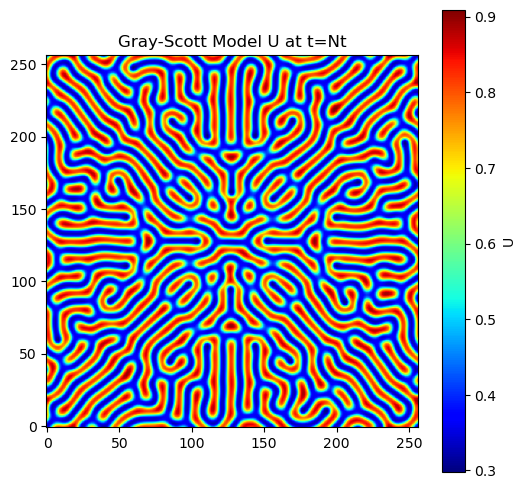

In [62]:
import numpy as np
import matplotlib.pyplot as plt

N = 256
Nt = 30000
tau = 1
h = 1
Du, Dv, f, r = 0.16, 0.08, 0.06, 0.062

Au = Du * tau / h**2
Av = Dv * tau / h**2

U = 0.02 * np.random.random((N+1, N+1))
V = 0.02 * np.random.random((N+1, N+1))
U[N//2-16:N//2+16, N//2-16:N//2+16] = 0.5
V[N//2-16:N//2+16, N//2-16:N//2+16] = 0.25

for k in range(Nt):
    U_new = (1-4.0*Au)*U + \
            Au*(np.roll(U, 1, axis=0) + np.roll(U, -1, axis=0) +
                np.roll(U, 1, axis=1) + np.roll(U, -1, axis=1)) - \
            tau*U*V*V + tau*f*(1.0-U)
    V_new = (1-4.0*Av)*V + \
            Av*(np.roll(V, 1, axis=0) + np.roll(V, -1, axis=0) +
                np.roll(V, 1, axis=1) + np.roll(V, -1, axis=1)) + \
            tau*U*V*V - tau*(f+r)*V
    U, V = U_new, V_new

plt.figure(figsize=(6,6))
plt.imshow(U, cmap='jet', origin='lower')
plt.colorbar(label='U')
plt.title('Gray-Scott Model U at t=Nt')
plt.show()

一维波动方程的求解

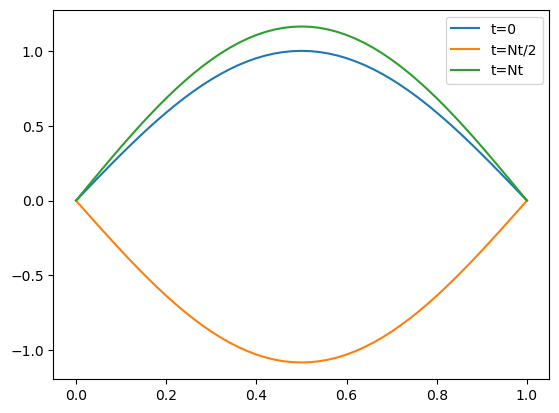

In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt

h = 0.02
v = 1
tau = 0.2
A = v*h/tau
Nx = 50
Nt = 1000
Y = np.zeros((Nx+1, Nt+1))
time = np.arange(0, Nt+1, 1)
x = np.arange(0, (Nx+1)*h, h)

for i in range(Nx+1):
    Y[i, 0] = np.sin(math.pi * h * i)
    Y[i, 1] = Y[i, 9]

for k in range(Nt+1):
    Y[0, k] = 0
    Y[Nx, 0] = 0

for k in range(1, Nt):
    for i in range(1, Nx):
        Y[i, k+1] = 2 * (1-A**2) * Y[i, k] + A**2 * (Y[i+1, k]+ Y[i-1, k])-Y[i, k-1]

plt.plot(x, Y[:, 0], label='t=0')
plt.plot(x, Y[:, Nt//2], label='t=Nt/2')
plt.plot(x, Y[:, Nt], label='t=Nt')
plt.legend()
plt.show()

二维薄膜振动问题

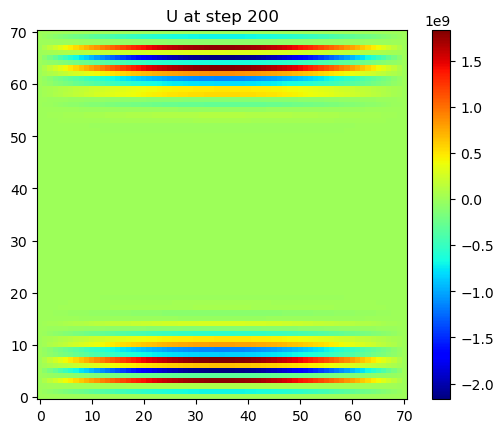

In [ ]:
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

h = math.pi / 70
v = 1
tau = 0.2
A = v * h / tau
Nx = 70
Ny = 70
Nt = 250

U = np.zeros((Nx+1, Ny+1, Nt+1))
X = np.arange(0, Nx+1, 1)
Y = np.arange(0, Ny+1, 1)

U[:, :, 0] = np.sin(X * h)[:, None] * np.sin(Y * h)[None, :]
U[:, :, 1] = U[:, :, 0]

U[:, 0, :] = 0
U[:, Ny, :] = 0
U[0, :, :] = 0
U[Nx, :, :] = 0

for k in range(1, Nt):
    U[1:Nx, 1:Ny, k+1] = 2*U[1:Nx, 1:Ny, k] - U[1:Nx, 1:Ny, k-1] + A**2*(U[2:Nx+1, 1:Ny, k]-U[0:Nx-1, 1:Ny, k]-4*U[1:Nx, 1:Ny, k]+U[1:Nx, 2:Ny+1, k]+U[1:Nx, 0:Ny-1, k])


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
Xg, Yg = np.meshgrid(X, Y)
ax1.plot_wireframe(Xg, Yg, U[:, :, 200])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('U(x,y)')
plt.show()